# Insper: Prof Márcio

# Ciência dos dados: Engenharias

# Projeto 3: PNADC - Uso dos microdados de 2023
___


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

___
## URL das bases de dados da PNADC <br>
Os microdados dos quatro trimestre de 2023 estão armazenados, por ora, no **Dropbox da profa. Maria Kelly Venezuela**. <br>
Esses dados são de uso exclusivo dos alunos da Engenharia do Insper.

In [2]:
# PRIMEIRO TRIMESTRE DE 2023
url1 = 'https://www.dropbox.com/scl/fi/fv6fli3jyuinijotw9v6b/pnad23_1.csv?rlkey=1nq6xfd1fn7guz4nyhvwslp7p&st=qpr7odgu&dl=1'

# SEGUNDO TRIMESTRE DE 2023
url2 = 'https://www.dropbox.com/scl/fi/kvhduq8ocy2o1yj4l0ycc/pnad23_2.csv?rlkey=ni8nhwkv84xg59mp1cnd4gsto&st=yr8uiq5k&dl=1'

# TERCEIRO TRIMESTRE DE 2023
url3 = 'https://www.dropbox.com/scl/fi/ol5m8stpd50e7endyal5d/pnad23_3.csv?rlkey=kik14kn4wqbcbdsmgq44z2i4s&st=9reoxjte&dl=1'

# QUARTO TRIMESTRE DE 2023
url4 = 'https://www.dropbox.com/scl/fi/ksca0i4ybo6hno738pjcw/pnad23_4.csv?rlkey=e186niofxka6lmmlbkefr94zw&st=wntcupiu&dl=1'

___
# Leitura da base de dados - PNADC 2023:

### LEITURA DA BASE DE DADOS INTEIRA - 1o TRIMESTRE <br>
Exemplo de como ler a base de dados a partir da url. <br>
Troque o nome `url1` para o nome de outro trimestre que tenha interesse de analisar

In [3]:
pnad23_4_all = pd.read_csv(url4)

In [4]:
pnad23_4_all.Ano.value_counts()

Ano
2023    473206
Name: count, dtype: int64

___
### LEITURA DE ALGUMAS COLUNAS <br>
Para saber o significado das linhas e colunas, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

In [74]:
# Colunas selecionadas 1 trimestre:
colunas = ["UF", #Estado
           "Capital", #capital
           "V1022",  #"Rural ou Urbano" # "Situação do domicílio"

           "V1023", #Tipo de área
                               'V2001',  # N de pessoas na casa
                               "V2007",  # Sexo 
                               "V2009",   # Idade
                               "V2010", # Cor/etnia
           "V3001", #sabe ler e escrever
           "V3006", #Qual é o ano/série/semestre que ... frequenta?
           "V3007", #já concluiu algum outro curso de graduação?
           "V3008", #Anteriormente ... frequentou escola?
           
           "V3013", #Qual foi o último ano/série/semestre que ... concluiu com aprovação, neste curso que frequentou anteriormente
           "V3014", #concluiu este curso que frequentou anteriormente
           "V4001", #Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em dinheiro?
           "V4002", #Na semana de ... a ... (semana de referência), ... trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em produtos, mercadorias, moradia, alimentação, etc.?
           "V4003", #Na semana de ... a ... (semana de referência), ... fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?  
           
           "V40121", #Trabalhador não remunerado
           
           "V403311", #Número da faixa do rendimento/retirada em dinheiro
           "V403312", #Qual era o rendimento bruto/retirada mensal que ... recebia/fazia normalmente nesse trabalho ? (valor em dinheiro)
           "V403422", #Qual foi o rendimento bruto/retirada que ... recebeu/fez nesse trabalho, no mês de referência ? (valor estimado dos produtos ou mercadorias)
           
           "VD3004", #Nível de instrução mais elevado alcançado (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental -  SISTEMA DE 9 ANOS
           "VD3005", #Anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental - SISTEMA DE 9 ANOS
           "VD3006", #Grupos de anos de estudo (pessoas de 5 anos ou mais de idade) padronizado para o Ensino fundamental  - SISTEMA DE 9 ANOS
           
          ]

# Leitura da base de dados filtrando apenas as colunas contidas na lista `colunas`
pnad23_2_small = pd.read_csv(url2, usecols=colunas)


In [46]:
pnad23_2_small

,UF,Capital,V1022,V1023,V2001,V2007,V2010,V3001,V3006,V3007,...,V4001,V4002,V4003,V40121,V403311,V403312,V403422,VD3004,VD3005,VD3006
0,11,11.0,1,1,2,1,4,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,5.0,12.0,5.0
1,11,11.0,1,1,2,2,4,1.0,NaN,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,12.0,5.0
2,11,11.0,1,1,1,2,4,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,4.0,3500.0,NaN,7.0,16.0,6.0
3,11,11.0,1,1,2,2,4,1.0,NaN,NaN,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,12.0,5.0
4,11,11.0,1,1,2,2,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,53,53.0,1,1,2,1,1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,6.0,10000.0,NaN,7.0,16.0,6.0
474571,53,53.0,1,1,2,2,1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,3.0,2500.0,NaN,7.0,16.0,6.0
474572,53,53.0,1,1,3,1,1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,7.0,14.0,5.0
474573,53,53.0,1,1,3,2,1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,5.0,5000.0,NaN,7.0,16.0,6.0


In [75]:
cols ={"V1023":"Tipo de área",
                               "V1022":"Rural ou Urbano", # "Situação do domicílio"
                               'V2001': 'Pessoas na Casa',
                               "V2007" : 'Sexo',
                               "V3001":"alfabetizado?",
                               "V2009": "Idade",
                               "V2010": "Cor",
    
                               "V3006":"ano/série/semestre que frequenta", 
                               "V3007":"já concluiu alguma graduação",
                               "V3008":"frequentou escola?",
                               
                               #"V3012":"concluiu com aprovação, pelo menos a primeira série",
                               "V3013":"último ano/série/semestre que concluiu com aprovação",
                               "V3014":"concluiu o curso",
                               "V4001":"Trabalha ou faz estágio remunerado", # Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em atividade remunerada em dinheiro
                               "V4002":"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",
                               "V4003":"Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?",
                               #"V4004":"Na semana ajudou durante pelo menos 1 hora, sem receber pagamento, no trabalho remunerado de algum morador do domicílio ou de parente?",
                               #"V4009":"Quantos trabalhos tinha na semana", 
                               #"V4010":"Código da ocupação (cargo ou função)",  
                               #"V4012":"Nesse trabalho, era:",
                               "V40121":"Trabalhador não remunerado",
                               #"V4013":"Código da principal atividade desse negócio/empresa", 
                               "V403311":"Número da faixa do rendimento/retirada em dinheiro",
                               "V403312":"rendimento bruto mensal em dinheiro", 
                               "V403422":"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",
                               #"VD2003":"Número de componentes do domicílio (exclusive pensionista, empregado doméstico ou parente do empregado doméstico",
                               #"VD2004":"Espécie da unidade doméstica",
                               "VD3004":"Nível de instrução mais elevado alcançado (>= 5 anos)",
                               "VD3005":"Anos de estudo (>= 5 anos)",
                               "VD3006":"Grupos de anos de estudo (>= 5 anos)",
                               #"VD4001":"Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade",
                               #"VD4002":"Condição de ocupação na semana de referência para pessoas de idade >= 14 anos"
      }

Renomeando colunas para melhor entendimento 

In [76]:
pnad23_2_small.rename(columns = cols, inplace=True)

Vamos contar as frequencias absolutas de respostas com NaN para vermos quais variáveis já podem ser excluidas da análise por falta de informação

In [42]:

# Conta frequencias absolutas de todas respostas de todas colunas do banco de dados 
for coluna in pnad23_2_small: 
    display(pnad23_2_small[f'{coluna}'].value_counts().to_frame()) 

# PRINCIPAIS  
# Capital: 363062
# ano/série/semestre que frequenta: 375676
# já concluiu alguma graduação: 457181
# último ano/série/semestre que concluiu com aprovação: 190803
# Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?: 272107
# Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?: 272747
# Trabalhador não remunerado: 469389
# rendimento bruto mensal em dinheiro: 277657
# Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias: 474018


,count
UF,
35,37053
31,35028
33,33795
21,30802
42,30339
41,25267
43,24921
29,22946
23,22433


,count
Capital,
0.0,363062
33.0,11791
35.0,9082
53.0,8992
13.0,6726
27.0,5444
31.0,4957
23.0,4792
12.0,4608


,count
Tipo de área,
4,299054
1,111513
2,58653
3,5355


,count
Pessoas na Casa,
3,126600
4,113192
2,103120
5,56305
1,31968
6,23796
7,10283
8,4664
9,2466


,count
Sexo,
2,244738
1,229837


,count
Cor,
4,236287
1,186881
2,45816
3,2792
5,2750
9,49


,count
alfabetizado?,
1.0,402520
2.0,44980
0.0,27075


,count
ano/série/semestre que frequenta,
0.0,375676
1.0,16283
3.0,15421
2.0,15344
8.0,8684
4.0,8670
6.0,8592
5.0,8464
7.0,8344


,count
já concluiu alguma graduação,
0.0,457181
2.0,15625
1.0,1769


,count
frequentou escola?,
1.0,316670
0.0,137692
2.0,20213


,count
último ano/série/semestre que concluiu com aprovação,
0.0,190803
3.0,113007
4.0,41228
8.0,36845
2.0,19852
5.0,19771
1.0,16638
6.0,13415
7.0,10228


,count
concluiu o curso,
1.0,185088
0.0,169961
2.0,119526


,count
Trabalha ou faz estágio remunerado,
2.0,202468
1.0,187786
0.0,84321


,count
"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",
0.0,272107
2.0,201828
1.0,640


,count
Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?,
0.0,272747
2.0,195906
1.0,5922


,count
Trabalhador não remunerado,
0.0,469389
1.0,4655
2.0,461
3.0,70


,count
Número da faixa do rendimento/retirada em dinheiro,
0.0,277657
3.0,69436
2.0,50646
1.0,25203
4.0,20241
5.0,18651
6.0,9113
7.0,2921
8.0,707


,count
rendimento bruto mensal em dinheiro,
0.0,277657
1320.0,18985
2000.0,14943
1500.0,11803
3000.0,10758
...,...
15940.0,1
7188.0,1
2059.0,1


,count
"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",
0.0,474018
300.0,71
200.0,52
100.0,45
600.0,44
...,...
4500.0,1
85.0,1
25.0,1


,count
Nível de instrução mais elevado alcançado (>= 5 anos),
2.0,160750
5.0,108143
7.0,54634
1.0,41630
3.0,33927
4.0,30789
0.0,27075
6.0,17627


,count
Anos de estudo (>= 5 anos),
12.0,106084
0.0,68705
16.0,51842
5.0,37132
9.0,33927
6.0,24698
4.0,18361
8.0,18284
7.0,17821


,count
Grupos de anos de estudo (>= 5 anos),
5.0,130322
3.0,97935
4.0,62974
2.0,62797
6.0,51842
1.0,41630
0.0,27075


Como algumas colunas estão cheias de NaN como resposta, iremos substituí-los por 0.0

In [77]:
pnad23_2_small.fillna(0, inplace=True)
pnad23_2_small

,UF,Capital,Rural ou Urbano,Tipo de área,Pessoas na Casa,Sexo,Idade,Cor,alfabetizado?,ano/série/semestre que frequenta,...,Trabalha ou faz estágio remunerado,"Na semana trabalhou ou estagiou, durante pelo menos 1 hora, em alguma atividade remunerada em outra espécie?",Na semana fez algum bico ou trabalhou em alguma atividade ocasional remunerada durante pelo menos 1 hora?,Trabalhador não remunerado,Número da faixa do rendimento/retirada em dinheiro,rendimento bruto mensal em dinheiro,"Qual foi o rendimento bruto, valor estimado dos produtos ou mercadorias",Nível de instrução mais elevado alcançado (>= 5 anos),Anos de estudo (>= 5 anos),Grupos de anos de estudo (>= 5 anos)
0,11,11.0,1,1,2,1,30,4,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,5000.0,0.0,5.0,12.0,5.0
1,11,11.0,1,1,2,2,29,4,1.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,5.0,12.0,5.0
2,11,11.0,1,1,1,2,50,4,1.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3500.0,0.0,7.0,16.0,6.0
3,11,11.0,1,1,2,2,25,4,1.0,0.0,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,5.0,12.0,5.0
4,11,11.0,1,1,2,2,2,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,53,53.0,1,1,2,1,38,1,1.0,0.0,...,1.0,0.0,0.0,0.0,6.0,10000.0,0.0,7.0,16.0,6.0
474571,53,53.0,1,1,2,2,30,1,1.0,0.0,...,1.0,0.0,0.0,0.0,3.0,2500.0,0.0,7.0,16.0,6.0
474572,53,53.0,1,1,3,1,51,1,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,5000.0,0.0,7.0,14.0,5.0
474573,53,53.0,1,1,3,2,56,1,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,5000.0,0.0,7.0,16.0,6.0


___

### IMPORTANTE ALTERAR DESCRIÇÃO DA CATEGORIA DAS VARIÁVEIS QUALITATIVAS 
Para saber o significado das categorias, veja o arquivo Excel `dicionario_PNADC_microdados_trimestral.xlsx`

In [85]:

for coluna in cols.values():
    if coluna not in[ 'rendimento bruto mensal em dinheiro','Pessoas na Casa','Idade',"Anos de estudo (>= 5 anos)"]:
        pnad23_2_small[coluna] = pnad23_2_small[coluna].astype('category')

In [12]:
# Alterando as categorias pelas suas descrições - VEJA AULA DO NOSSO CURSO   
#pnad23_1_small.Sexo = pnad23_1_small.Sexo.cat.rename_categories({1:'Homem', 2:'Mulher'})
#pnad23_1_small.Sexo.value_counts(True).round(3)*100

Filtrando Colunas que vamos realmente usar                       

In [163]:
dados = pnad23_2_small[["UF","Capital","Rural ou Urbano","Tipo de área",'Pessoas na Casa','Sexo',"alfabetizado?","Idade","Cor","frequentou escola?","rendimento bruto mensal em dinheiro","Trabalha ou faz estágio remunerado","Nível de instrução mais elevado alcançado (>= 5 anos)","Anos de estudo (>= 5 anos)"]]
dados

,UF,Capital,Rural ou Urbano,Tipo de área,Pessoas na Casa,Sexo,alfabetizado?,Idade,Cor,frequentou escola?,rendimento bruto mensal em dinheiro,Trabalha ou faz estágio remunerado,Nível de instrução mais elevado alcançado (>= 5 anos),Anos de estudo (>= 5 anos)
0,11,11.0,1,1,2,1,1.0,30,4,1.0,5000.0,1.0,5.0,12.0
1,11,11.0,1,1,2,2,1.0,29,4,1.0,0.0,2.0,5.0,12.0
2,11,11.0,1,1,1,2,1.0,50,4,1.0,3500.0,1.0,7.0,16.0
3,11,11.0,1,1,2,2,1.0,25,4,1.0,0.0,2.0,5.0,12.0
4,11,11.0,1,1,2,2,0.0,2,4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474570,53,53.0,1,1,2,1,1.0,38,1,1.0,10000.0,1.0,7.0,16.0
474571,53,53.0,1,1,2,2,1.0,30,1,0.0,2500.0,1.0,7.0,16.0
474572,53,53.0,1,1,3,1,1.0,51,1,1.0,5000.0,1.0,7.0,14.0
474573,53,53.0,1,1,3,2,1.0,56,1,1.0,5000.0,1.0,7.0,16.0


### Análise Exploratória de Dados


Tabela de Medidas Resumo para entender melhor as Variáveis Quantitativas

In [96]:
# Tabela de Medidas Resumo para Variáveis Quantitativas
tabela_quantitativas = dados[["Pessoas na Casa","rendimento bruto mensal em dinheiro","Idade","Anos de estudo (>= 5 anos)"]].describe()
tabela_quantitativas

,Pessoas na Casa,rendimento bruto mensal em dinheiro,Idade
count,474575.000000,474575.000000,474575.000000
mean,3.479638,1090.026906,37.372135
std,1.594845,2831.800672,22.231789
min,1.000000,0.000000,0.000000
25%,2.000000,0.000000,18.000000
50%,3.000000,0.000000,37.000000
75%,4.000000,1350.000000,55.000000
max,22.000000,250000.000000,115.000000


Histogramas sobre as Variáveis Quantitativas Pessoas na casa, Renda Bruta Mensal, Idade e Anos de Estudo

{'whiskers': [<matplotlib.lines.Line2D at 0x1f7e7a70dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7e7a725d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7e7a703d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f7e7a73ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7e7a80510>],
 'means': []}

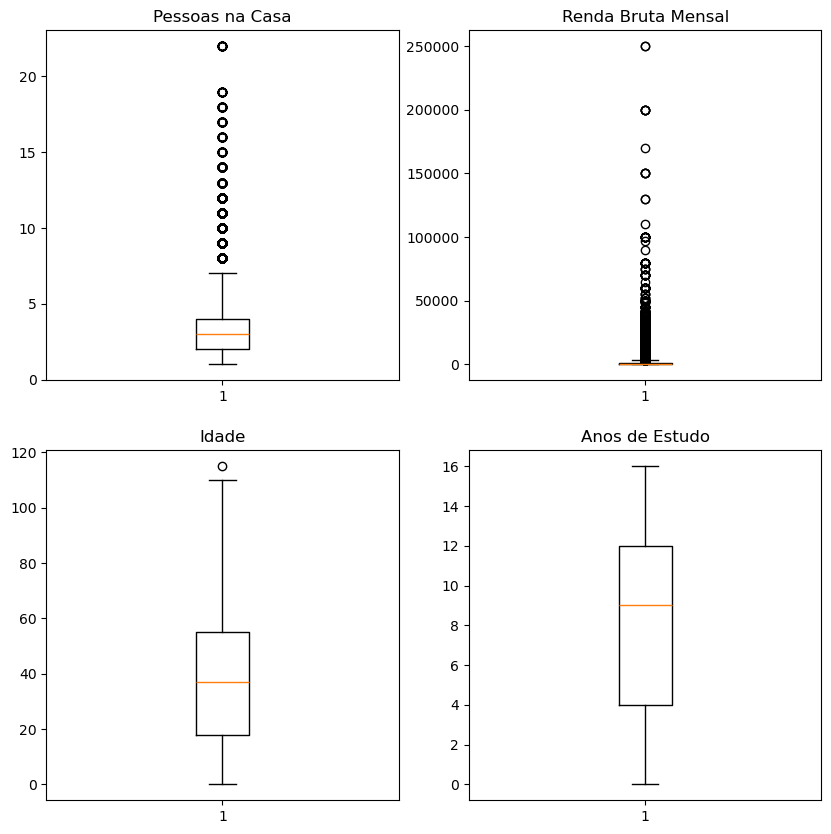

In [92]:
# Histogramas com as variaveis quantitativas
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Pessoas na Casa")
plt.boxplot(dados["Pessoas na Casa"])

plt.subplot(222)
plt.title("Renda Bruta Mensal")
plt.boxplot(dados["rendimento bruto mensal em dinheiro"])

plt.subplot(223)
plt.title("Idade")
plt.boxplot(dados["Idade"])

plt.subplot(224)
plt.title("Anos de Estudo")
plt.boxplot(dados["Anos de estudo (>= 5 anos)"])

Correlações entre Target e Features 

In [145]:
# Correlações das Features Quantidade de Pessoas, Idade e Anos de Estudi com a nossa target Renda

corr_Renda_nPessoas = dados["rendimento bruto mensal em dinheiro"].corr(dados["Pessoas na Casa"])
corr_Renda_Idade = dados["rendimento bruto mensal em dinheiro"].corr(dados["Idade"])
corr_Renda_AnosEstudos = dados["rendimento bruto mensal em dinheiro"].corr(dados["Anos de estudo (>= 5 anos)"])

display("Correlação Renda e Quantidade de Pessoas",corr_Renda_nPessoas)
display("Correlação entre renda e Idade",corr_Renda_Idade)
display("Correlação entre Renda e Anos de Estudos",corr_Renda_AnosEstudos)

'Correlação Renda e Quantidade de Pessoas'

-0.07988036988260548

'Correlação entre renda e Idade'

0.0983841075015069

'Correlação entre Renda e Anos de Estudos'

0.3334315331251701

Histogramas para as Variáveis Qualitativas

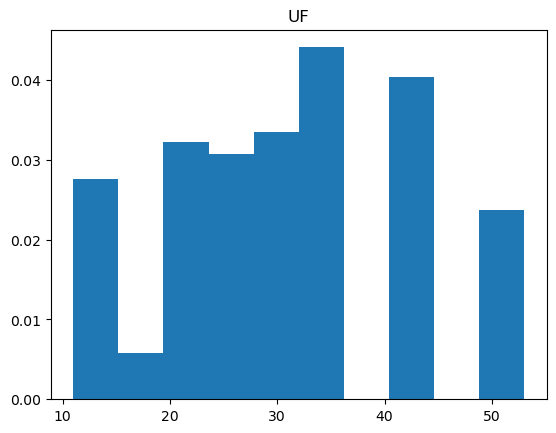

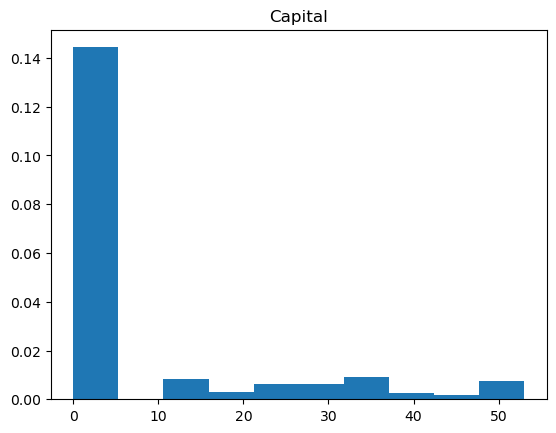

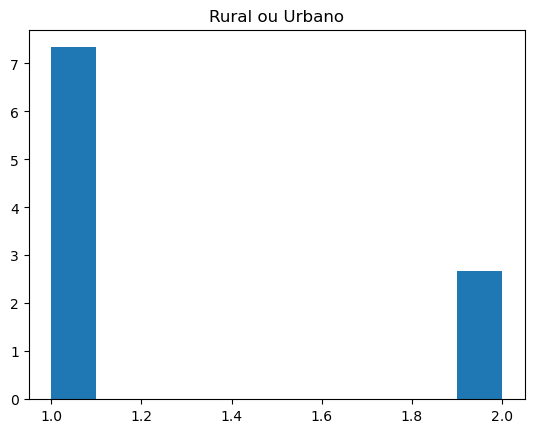

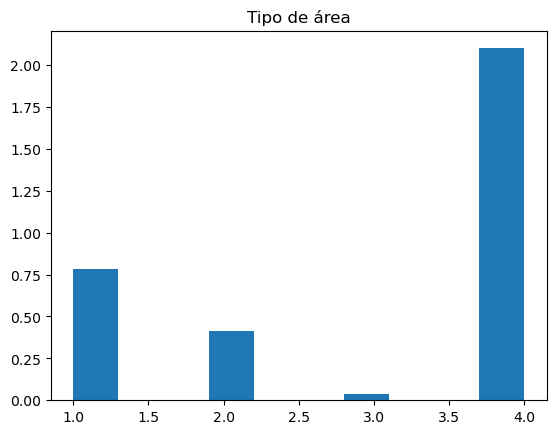

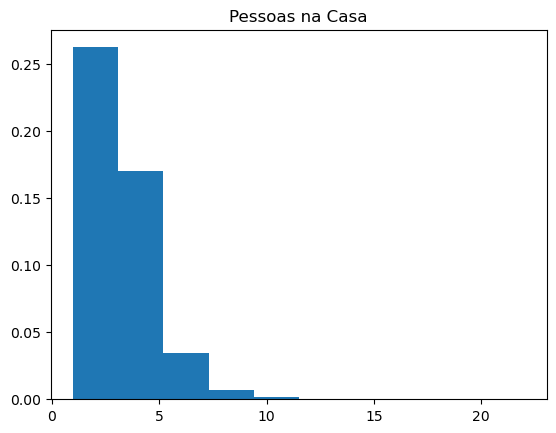

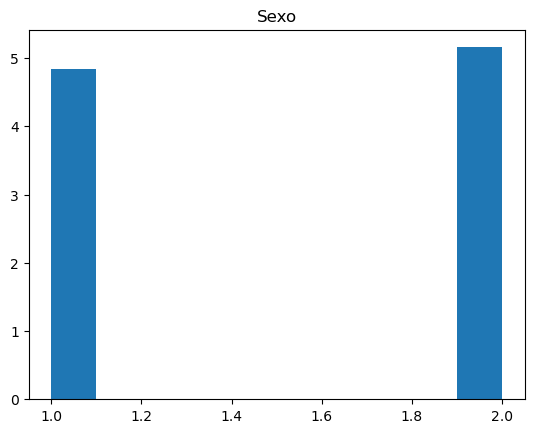

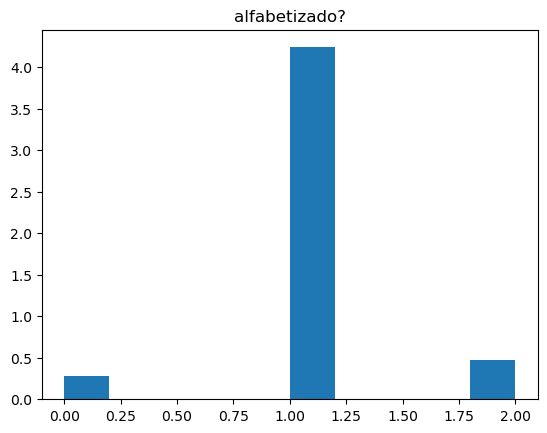

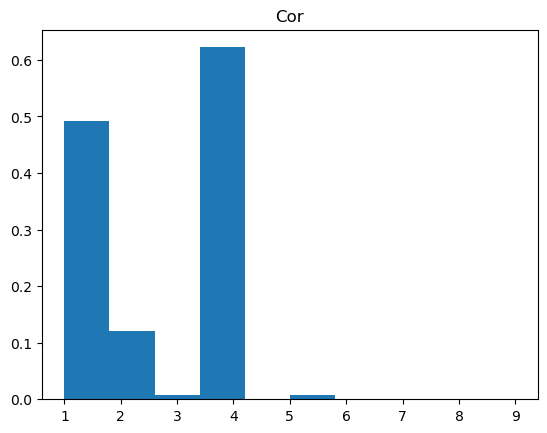

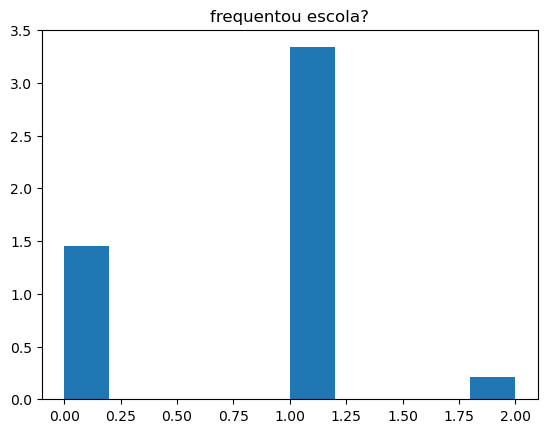

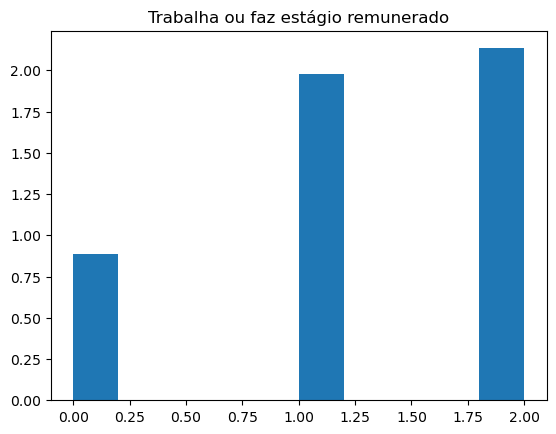

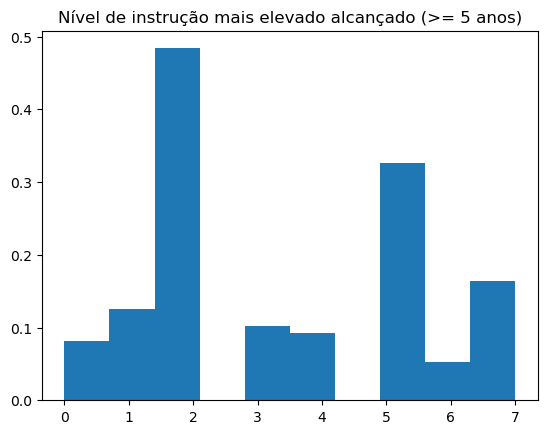

In [168]:
dados_qualitativos = dados[["UF",	"Capital",	"Rural ou Urbano",	"Tipo de área",	"Pessoas na Casa",	"Sexo",	"alfabetizado?",	"Cor",	"frequentou escola?"	,	"Trabalha ou faz estágio remunerado",	"Nível de instrução mais elevado alcançado (>= 5 anos)"]]

#plt.figure(figsize=(25,50))
#i = 1

for coluna in dados_qualitativos:
    plt.title(f"{coluna}")
    #plt.subplot(8,2,i)
    plt.hist(dados[f'{coluna}'],density=True,bins=10)
    plt.show()
    #i+=1
